In [1]:
# Installing the libraries

**Importing the libraries**

In [ ]:
!pip install google-play-scraper

In [4]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

List of habits and do list apps from google:

In [5]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

In [36]:
len(app_packages)

15

In [7]:
app_info=[]

for ap in tqdm(app_packages):
  info = app(ap, lang='eng', country='us')
  del info ['comments']
  app_info.append(info)

100%|██████████| 15/15 [00:02<00:00,  5.32it/s]


In [16]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [18]:
print_json(app_info[1])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.todoist",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83c\udfc6 <b>2020 Editor's Choice</b> by Google\r\n\ud83e\udd47 \"<b>Todoist is the best to-do list app right now</b>\" - The Verge\r\n\r\nTodoist is used by 20 million people to organize, plan and collaborate on projects, both big and small.\r\n\r\nUse Todoist to:\r\n\u2022 Capture and organize tasks the moment they pop into your head.\r\n\u2022 Remember deadlines with reminders and due dates. \r\n\u2022 Build lasting habits with recurring due dates like \"every Monday\".\r\n\u2022 Organize your projects in kanban style with Boards.\r\n\u2022 Collaborate on projects by assigning tasks to others.\r\n\u2022 Prioritize your tasks with priority levels.\r\n\u2022 Track your progress with personalized productivity trends.\r\n\u2022 Int

Images of the app icons

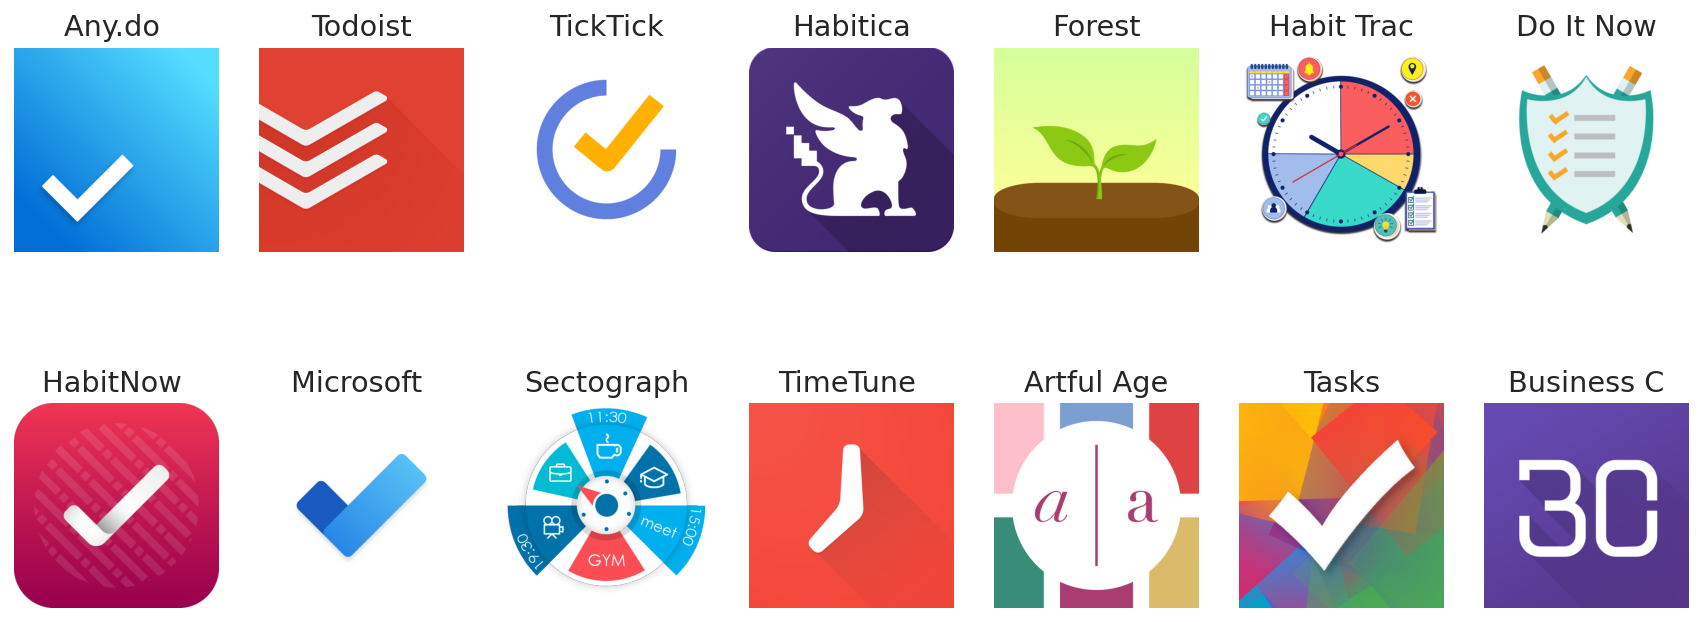

In [26]:
fig,axs = plt.subplots(2, len(app_info)//2, figsize=(15,6))

def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]


for i, ax in enumerate(axs.flat):
  ai=app_info[i]
  img=plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')


Converstion of the raw dataset to pd dataframe



In [34]:
app_info_df=pd.DataFrame(app_info)
app_info_df.to_csv("app.csv",index=None, header=True)

In [35]:
app_info_df.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,"Any.do - To do list, planner & calendar","🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,"Simple planner with to-do list, tasks, reminde...","Simple planner with to-do list, tasks, reminde...","10,000,000+",10000000,4.474017,389413,133012,"[23416, 8238, 18636, 49171, 289952]",0,True,USD,False,None,None,None,True,$0.99 - $83.88 per item,Varies with device,Varies,Varies with device,Any.do To-do list & Calendar,5304780265295461149,feedback+androidtodo@any.do,https://www.any.do,"Any.do Inc.\n\n156 Begin St. 22nd floor, Tel A...",https://www.any.do/privacy,5304780265295461149,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/zgOLUXCH...,https://play-lh.googleusercontent.com/umhDP6ph...,[https://play-lh.googleusercontent.com/cGoZDZR...,None,None,Everyone,None,None,False,"Nov 10, 2011",1628143078,Varies with device,"- Dark mode is finally here, hooray! \r\n- Rec...","- Dark mode is finally here, hooray! <br>- Rec...",False,com.anydo,https://play.google.com/store/apps/details?id=...
1,"Todoist: To-Do List, Tasks & Reminders","🏆 <b>2020 Editor's Choice</b> by Google\r\n🥇 ""...",🏆 <b>2020 Editor&#39;s Choice</b> by Google<br...,“The best to-do list app right now” - The Verg...,“The best to-do list app right now” - The Verg...,"10,000,000+",10000000,4.538398,228321,68892,"[10500, 3716, 8428, 35387, 170290]",0,True,USD,False,None,None,None,True,$0.99 - $36.00 per item,Varies with device,Varies,Varies with device,Doist,6748661820728732000,support@todoist.com,http://todoist.com,"Doist\n201 Mission Street, Suite 1200\nSan Fra...",https://todoist.com/privacy,6748661820728732000,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/GK0SwEBV...,https://play-lh.googleusercontent.com/sAjzU1fU...,[https://play-lh.googleusercontent.com/cealfl9...,None,None,Everyone,None,None,False,"Nov 18, 2012",1628599090,Varies with device,"Group edit tasks — now in board view, too!\r\n...","Group edit tasks — now in board view, too!<br>...",False,com.todoist,https://play.google.com/store/apps/details?id=...
2,"TickTick: ToDo List Planner, Reminder & Calendar",🥇<b>Great to-do list app for new Android devic...,🥇<b>Great to-do list app for new Android devic...,Task & time manager by Editor’s Choice🏆. Get t...,Task &amp; time manager by Editor’s Choice🏆. G...,"1,000,000+",1000000,4.602229,82678,30144,"[3151, 1357, 2982, 10245, 64943]",0,True,USD,False,None,None,None,True,$0.99 - $27.99 per item,Varies with device,Varies,Varies with device,Appest Inc.,7269704759597705101,ticktick.com@gmail.com,https://ticktick.com,2035 Sunset Lake Road\nNewark\nDelaware\nUS,https://ticktick.com/about/privacy,7269704759597705101,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/YSlqf3WB...,https://play-lh.googleusercontent.com/m-kwaaJE...,[https://play-lh.googleusercontent.com/32pfblb...,None,None,Everyone,None,None,False,"Jun 19, 2013",1628650872,Varies with device,- Optimization for task option menu.\r\n- Supp...,- Optimization for task option menu.<br>- Supp...,False,com.ticktick.task,https://play.google.com/store/apps/details?id=...
3,Habitica: Gamify Your Tasks,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,"1,000,000+",1000000,4.269539,19832,8220,"[1421, 824, 1609, 3110, 12868]",0,True,USD,False,None,Non

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Retrieving Reviews from Raw data
Creating the balanced datasets with the review labeling

In [37]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 15/15 [01:01<00:00,  4.10s/it]


In [41]:
app_reviews[2]

{'appId': 'com.anydo',
 'at': datetime.datetime(2021, 7, 15, 7, 10, 17),
 'content': 'let me see, what do I think... lets start at the beginning. I havent had this app installed for more than five minutes, and its already requesting for a review. That move right there brings my opinion of the app down to two stars... you may be wondering at this point why this isnt a two star review... well you see, I didnt want an account. I dont want an account and i dont want my data I put as notes to be saved to some sort of cloud.',
 'repliedAt': datetime.datetime(2021, 7, 15, 8, 15, 44),
 'replyContent': 'Like many other apps, we require users to log in with an account, to make sure that all your information is available 24/7 across all platforms. We recommend learning more about the app and all features here- https://support.any.do. We would be happy to get an updated review once you get to know the app better :)\n',
 'reviewCreatedVersion': '5.14.2.6',
 'reviewId': 'gp:AOqpTOHpsIzuG_MoIggxCRDa7

In [42]:
len(app_reviews)

16692

Converstion of reviews to CVS

In [45]:
app_reviews_df=pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [48]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEgA041yx9x7JTR5cAyfjzGRxIKhP3FLYbngru...,Jason Spafford,https://play-lh.googleusercontent.com/a-/AOh14...,The user interface is horrible. The way the ta...,1,33,5.14.4.5,2021-08-05 11:30:39,You can change the font size from your device ...,2021-08-08 14:08:07,most_relevant,com.anydo
1,gp:AOqpTOEl2pr_vNEk3yvhurm25OJcrQG7731QhY-OcLT...,Christopher Kullman,https://play-lh.googleusercontent.com/a-/AOh14...,Almost. As in good integration with other apps...,1,58,5.14.2.6,2021-07-19 10:07:00,You should only receive a pop-up about Premium...,2021-07-18 11:48:42,most_relevant,com.anydo
2,gp:AOqpTOHpsIzuG_MoIggxCRDa7YdH7j2Bw1hZaFIwhV6...,Shaden,https://play-lh.googleusercontent.com/a-/AOh14...,"let me see, what do I think... lets start at t...",1,10,5.14.2.6,2021-07-15 07:10:17,"Like many other apps, we require users to log ...",2021-07-15 08:15:44,most_relevant,com.anydo
3,gp:AOqpTOHObjABAAJpHLDEgA81DT8CXT8ZyLX0eXob74r...,A Miah,https://play-lh.googleusercontent.com/a/AATXAJ...,No point paying premium for colour tags when t...,1,1,5.14.4.5,2021-08-08 16:57:47,"The color tags are for tasks, and you will be ...",2021-08-09 15:06:50,most_relevant,com.anydo
4,gp:AOqpTOF3BBW6LGgIs0svMJpnKnst1lsDpoh0ZjPpcxm...,Claude Smoot,https://play-lh.googleusercontent.com/a-/AOh14...,As like every other App. They want your money....,1,34,5.14.2.5,2021-06-24 12:35:20,"90% of the app is completely free, including a...",2021-06-27 15:04:33,most_relevant,com.anydo
